In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Walmart.csv")

In [3]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
features = ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

In [6]:
# Assuming 'Date' is the timestamp column
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [7]:
X = data[features]
y = data['Weekly_Sales']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = linear_reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 316554511405.115
R-squared: 0.01738312550370069


In [13]:
# plt.figure(figsize=(12, 6))
# plt.plot(y_test.index, y_test, label='Actual Sales', marker='o')
# plt.plot(y_test.index, y_pred, label='Predicted Sales', marker='o')
# plt.xlabel('Date')
# plt.ylabel('Weekly Sales')
# plt.title('Actual vs. Predicted Sales Trends')
# plt.legend()
# plt.show()

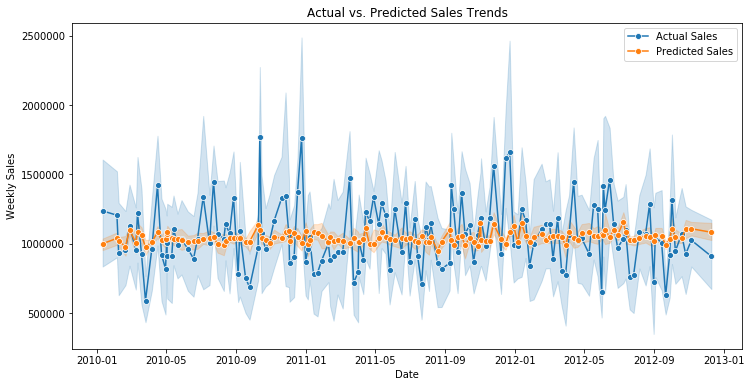

In [12]:
import seaborn as sns

# Step 6: Visualize Predicted Sales Trends
plt.figure(figsize=(12, 6))

# Plotting actual sales
sns.lineplot(x=y_test.index, y=y_test, label='Actual Sales', marker='o')

# Plotting predicted sales
sns.lineplot(x=y_test.index, y=y_pred, label='Predicted Sales', marker='o')

plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual vs. Predicted Sales Trends')
plt.legend()
plt.show()